In [55]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [56]:
train = pd.read_csv('/home/valeria/DE/Урок 4.1/train.csv')
#test = pd.read_csv('/home/valeria/DE/Урок 4.1/test.csv')


In [57]:
display(train.head())
print(train.info())
print()
train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



(891, 12)

In [58]:
# display(test.head())
# print(test.info())
# print()
# test.shape

Из данных на мой взгляд могут быть исключены данные столбца Name - так как эти данные представлены в текстовом формате и при построении моделей их не преобразовать в количественные или категориальные переменные. Также можно исключить PassengerId, так как этот признак указывает только Id пассажира. Уберу номер билета, так как этот признак не несет в себе содержательной инфомарции. Можно также исключить данные о номере каюты(Cabin), так как имеется большое количество пропусков.

имеются пропуски в столбцах Age и Embarked. Еслив столбце Embarked всего 2 пропуска, которые существенно могут не повлиять на модель, то в столбце Age пропусков уже больше (почти 20%).

In [59]:
train = train[train['Embarked'].notna()] # удалю строки с пропусками в столбце Embarked

In [60]:
display(train.corr()) # выведу значения корреляций
print()
train.describe() # информация о количественных признаках

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Прямой существенной зависимости столбцы  Age с другими столбцами не выявлено, поэтому предлагаю пустые значения в столбце Age заполнить медианным значением, которое практически совпадает со средним значением. 

In [61]:
train['Age'].fillna(28, inplace=True)

In [62]:
train[train['Age'].isna()] # проверка заполнения

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [63]:
train = train.drop(['PassengerId','Cabin','Name', 'Ticket'], axis = 1)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Проведу кодирование категориальных признаков.

In [65]:
train_ohe = pd.get_dummies(train, drop_first=True)
display(train_ohe.head())
train_ohe.info()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_male    889 non-null    uint8  
 7   Embarked_Q  889 non-null    uint8  
 8   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


Разделю выборку на тестовую и трейновую

In [66]:
x_train, x_test, y_train,  y_test = train_test_split(train_ohe.drop(['Survived'], axis=1), train_ohe['Survived'], 
                                                     stratify=train_ohe['Survived'], random_state=777)

In [67]:
x_numeric = ['Pclass', 'SibSp', 'Age', 'Fare']

In [69]:
scaler = StandardScaler()
scaler.fit(x_train[x_numeric]) 
pd.options.mode.chained_assignment = None
x_train[x_numeric] = scaler.transform(x_train[x_numeric])
x_test[x_numeric] = scaler.transform(x_test[x_numeric])
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
475,1,-0.127627,0,0,0.456265,1,0,1
69,3,-0.282078,2,0,-0.509050,1,0,1
804,3,-0.204852,0,0,-0.546638,1,0,1
257,1,0.026824,0,0,1.224730,0,0,1
256,1,-0.127627,0,0,1.062127,0,0,0


In [70]:
parametr_knn = {'n_neighbors': range(1, 30),
                'weights': ['uniform', 'distance'],
                'p': [1, 2]}

model_knn = KNeighborsClassifier()
grid = GridSearchCV(model_knn, parametr_knn, cv=5, n_jobs=-1, scoring='roc_auc')
grid.fit(x_train, y_train)
print(f"Лучшая модель имеет гиперпараметры:{grid.best_params_} и показывает ROC AUC: {grid.best_score_}")

Лучшая модель имеет гиперпараметры:{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'} и показывает ROC AUC: 0.8513543413251282


In [71]:
parametr_logit = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}
model_logit = LogisticRegression()
grid = GridSearchCV(model_logit, parametr_logit, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(f"Лучшая модель имеет гиперпараметры:{grid.best_params_} и показывает ROC AUC: {grid.best_score_}")

Лучшая модель имеет гиперпараметры:{'C': 5} и показывает ROC AUC: 0.8137807204578611


Построю модели с полученными параметрами моделей и оценю метрику ROC AUC. В качестве метрики будут использовать ROC AUC которая покажет площадь верно предсказанных значений. 

In [72]:
model_logit = LogisticRegression(C=5)
model_logit.fit(x_train, y_train)
probabilities_test = model_logit.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]
print(roc_auc_score(y_test, probabilities_one_test))

0.8339727195225917


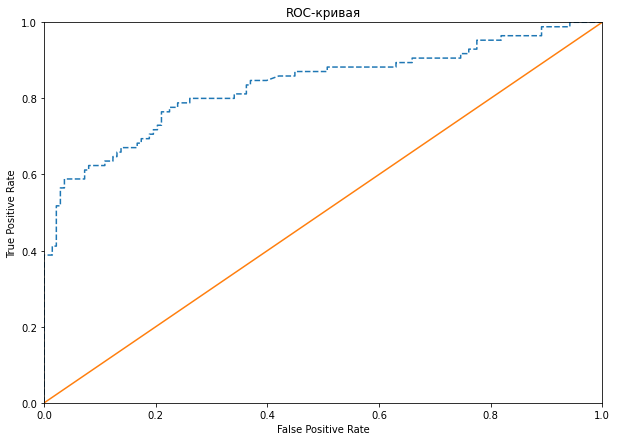

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) # построю график ROC AUC для логистической регрессии
x=[0, 1]
y=[0, 1]
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, linestyle='--')
plt.plot(x, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [74]:
model_knn = KNeighborsClassifier(n_neighbors=26, p=1, weights='uniform')
model_knn.fit(x_train, y_train)
probabilities_test = model_knn.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]
print(roc_auc_score(y_test, probabilities_one_test))

0.8466751918158568


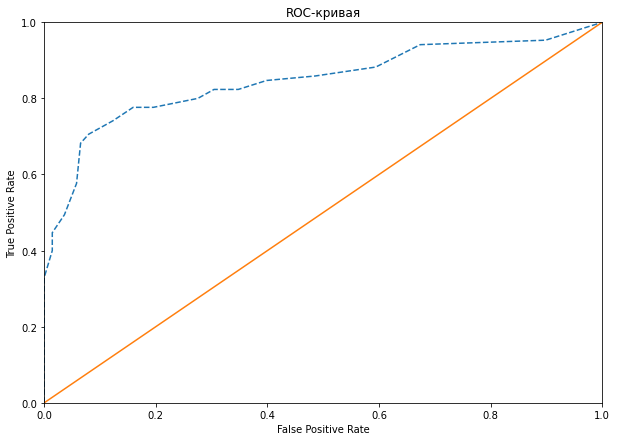

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) # построю график ROC AUC для логистической регрессии
x=[0, 1]
y=[0, 1]
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, linestyle='--')
plt.plot(x, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Лучшую метрику показывает модель К ближайших соседей с подобранными параметрами. При этом метрика ROC AUC на тестовых данных составляет 0,847. 